# Capstone Project: TED Talks Recommender Systems

*by Nee Bimin*

## Notebook 2: Exploratory Data Analysis

In this notebook, there will be data visualisations to explore the variables available in the dataset. We will follow up with Collaborative Topic Modeling in the next notebook.

## Content
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * [Ratings EDA](#Ratings-EDA)
    * [Occupation EDA](#Ratings-EDA)
- [Pre-processing](#Preprocessing)
    * [Tokenizing](#Tokenizing)
    * [Lemmatizing](#Lemmatizing)
    * [Stemming](#Stemming)

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline

In [2]:
# Read in data
ted = pd.read_csv('../data/ted_cleaned.csv')
ratings = pd.read_csv('../data/ratings.csv')
occupations = pd.read_csv('../data/occupations.csv')
tags = pd.read_csv('../data/tags.csv')

## Exploratory Data Analysis

### Ratings EDA

In [3]:
ratings.head()

,funny,beautiful,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuasive,jaw_dropping,ok,obnoxious,inspiring,total,positive,negative,talk_id
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93850,91538,1138,1
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413,2936,2169,564,2
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230,2824,2327,351,3
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,3728,3487,156,4
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893,25620,25062,310,5


The plot below shows the number of positive, neutral (OK) and negative ratings.

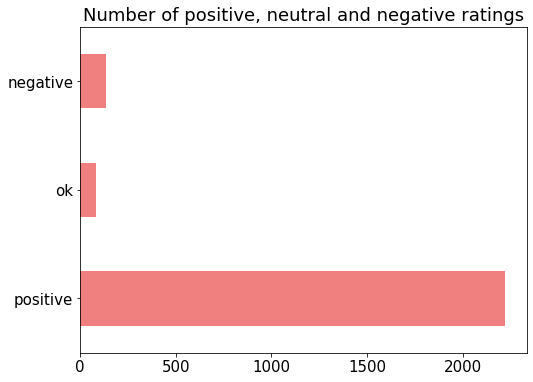

In [4]:
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 15})
ratings[['positive', 'ok', 'negative']].mean().plot(kind='barh', color='lightcoral')
plt.title('Number of positive, neutral and negative ratings');

Now we will look at the breakdown of ratings voted for.

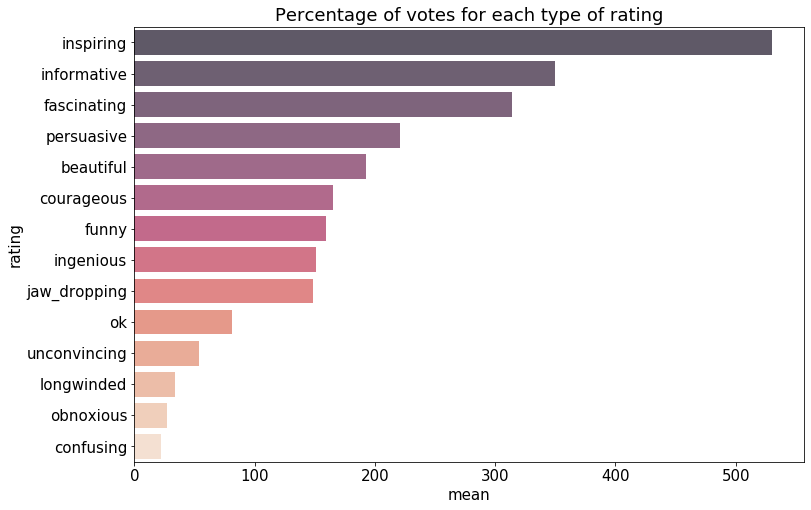

In [5]:

count_talks = defaultdict(list)
for rating in ratings.columns:
    if (rating != 'talk_id') & (rating != 'total') & (rating != 'positive') & (rating != 'negative'):
        count_talks['rating'].append(rating) 
        count_talks['mean'].append(ratings[ratings[rating] > 0][rating].mean())

count_talks = pd.DataFrame(count_talks).sort_values('mean', ascending = False)

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 15})
sns.barplot(x="mean", y="rating", data=count_talks, palette='rocket', alpha=0.7)
plt.title('Percentage of votes for each type of rating');

As expected, the more positive rating categories are voted for more frequently, e.g. inspiring, informative and fascinating. 

Next let's look at the most popular talks in terms of number of votes and compare whether the most voted for talks are the ones that received the greater percentage of positive votes i.e. let us check out the correlation. 

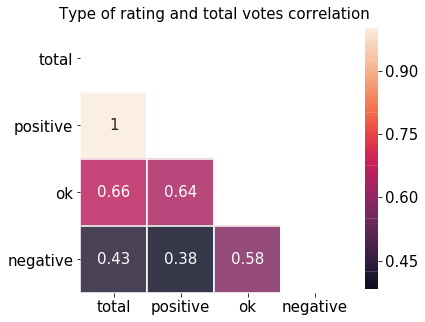

In [6]:
votes = ratings[['total', 'positive', 'ok', 'negative']].sort_values('total', ascending=False)

#Plot correlations on a heatmap
fig, ax = plt.subplots(figsize = (6,6))
plt.title('Type of rating and total votes correlation', fontsize = 15)
votes_corr = votes.corr()

#Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(votes_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
ax = sns.heatmap(votes_corr, mask=mask, cmap='rocket', alpha=0.8, annot = True, ax=ax, 
                 square=True, cbar_kws={"shrink": .8}, linewidths=.5)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=15)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), rotation='horizontal', fontsize=15);

The number of votes is very highly correlated with the number of positive votes, indicating that voters who vote will vote when the talk is good.

Next, let's explore the talks that have the highest number of votes. 

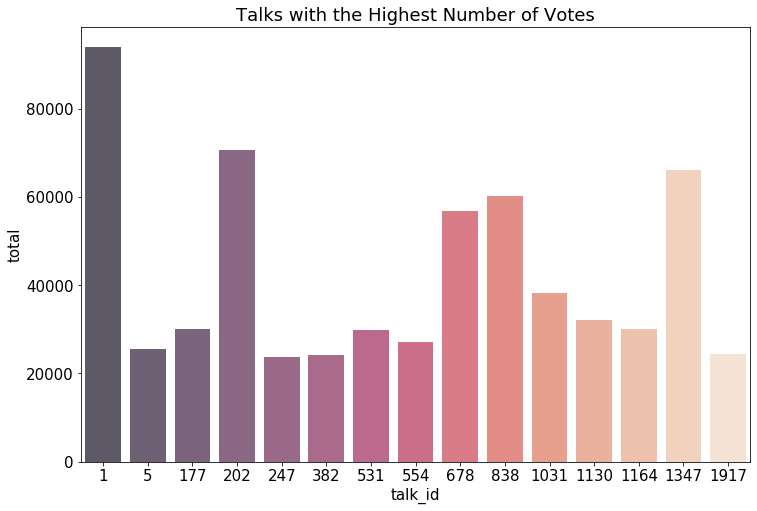

In [7]:
popular_talks = ratings[['total', 'talk_id']].sort_values('total', ascending=False).head(15)

plt.figure(figsize=(12,8))
sns.barplot(y='total', x='talk_id', data=popular_talks, alpha=0.7, palette='rocket');
plt.title("Talks with the Highest Number of Votes");
# # Get the distribution of the reviews
# x = ratings['total'].sort_values(ascending=False)
# x = x.iloc[0:20]
# plt.figure(figsize=(16,8))
# ax = sns.barplot(x.index, x.values, alpha=0.8, palette='magma')
# plt.title("Number of Reviews by Location")
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=45)
# plt.ylabel('Number of Reviews', fontsize=12)
# plt.xlabel('Location', fontsize=12)

# #adding the text labels
# rects = ax.patches
# labels = x.values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

# plt.show()

This may be useful for us later when we check the collaborative topic modeling recommendation later.

A new column, 'top_rating' will be creating in the ratings dataframe, consisting of the category of rating that is most voted for for each talk.

In [8]:
rating_cats = ratings[['funny', 'beautiful', 'ingenious', 'courageous', 'longwinded',
       'confusing', 'informative', 'fascinating', 'unconvincing', 'persuasive',
       'jaw_dropping', 'ok', 'obnoxious', 'inspiring']]

# Get the rating with the highest number of votes
ratings['top_rating'] = rating_cats.apply(lambda x: rating_cats.columns[x.argmax()], axis = 1)
ratings.head()

,funny,beautiful,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuasive,jaw_dropping,ok,obnoxious,inspiring,total,positive,negative,talk_id,top_rating
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93850,91538,1138,1,inspiring
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413,2936,2169,564,2,funny
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230,2824,2327,351,3,funny
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,3728,3487,156,4,inspiring
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893,25620,25062,310,5,informative


Before we check out the relationship between the top ratings and other variables in the main dataframe, we can first look at the most popular top ratings for each talk.

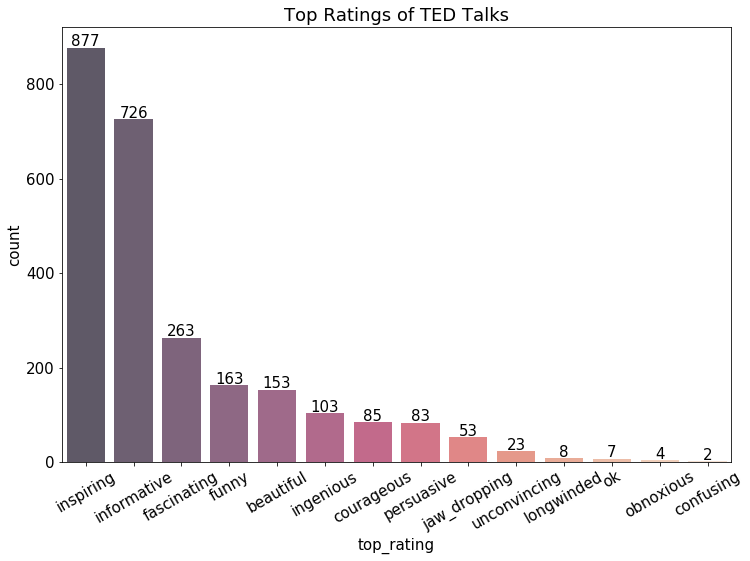

In [9]:
label_order = ratings['top_rating'].value_counts().sort_values(ascending = False).index

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x = 'top_rating', data = ratings, order = label_order, alpha=0.7, palette='rocket')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:d}'.format(height),
            ha="center") 
plt.xticks(rotation=30)
plt.title('Top Ratings of TED Talks');

Inspiring, informative and fascinating, which are also the ratings most voted for, are unsurprisingly also the ratings that best describe most of the talks.

### Ratings and TED Talks EDA

We can now check the relationship between the total votes and the other variables in the main dataframe e.g. number of views of the talks, number of comments, etc.

In [10]:
# Merge the main TED Talks dataframe with the ratings dataframe
ratings_ted = ted.merge(ratings, how = 'left', on = ['talk_id'])

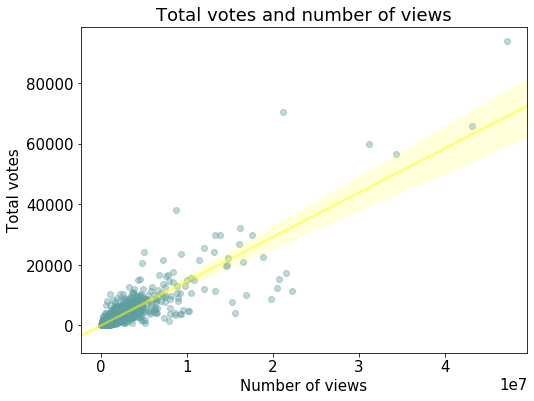

In [11]:
plt.figure(figsize=(8,6))
sns.regplot(x='views', y='total', data=ratings_ted, scatter_kws={'color': 'cadetblue', 'alpha':0.4}, 
            line_kws={'color': 'yellow', 'alpha':0.5})
plt.xlabel("Number of views")
plt.ylabel("Total votes")
plt.title('Total votes and number of views');

There seems to be a linear relationship between the number of votes and the number of views.
The higher the number of views, the higher the number of votes for the ratings, which makes sense because viewers have to watch the talk before rating it.

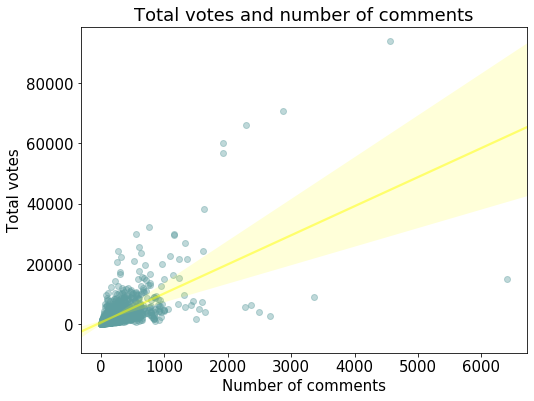

In [12]:
plt.figure(figsize=(8,6))
sns.regplot(x='comments', y='total', data=ratings_ted, scatter_kws={'color': 'cadetblue', 'alpha':0.4}, 
            line_kws={'color': 'yellow', 'alpha':0.5})
plt.xlabel('Number of comments')
plt.ylabel('Total votes')
plt.title('Total votes and number of comments');

The number of comments and total votes are also positively correlated. The number of comments are lower than the number of votes. Note that there is one particular talk with a relatively low number of ratings but high number of comments. We will check that out below.

In [13]:
top_comments = ratings_ted.sort_values('comments', ascending=False).head(5)
top_comments[['comments', 'positive', 'negative', 'ok', 'total', 'views']]

,comments,positive,negative,ok,total,views
96,6404,13509,1223,172,14904,4374792
0,4553,91538,1138,1174,93850,47227110
644,3356,7766,1148,215,9129,3433437
201,2877,68436,1593,636,70665,21190883
1787,2673,1975,501,280,2756,2162764


We see that the talk with the greatest number of comments has more positive ratings than negative, similar to the other talks with high numbers of comments. Perhaps the topic is interesting to relatively fewer people who are passionate about it, drawing fewer views and ratings but higher number of comments.

Next, we check out the correlation between the top ratings for each talk and the variables in the main dataframe.

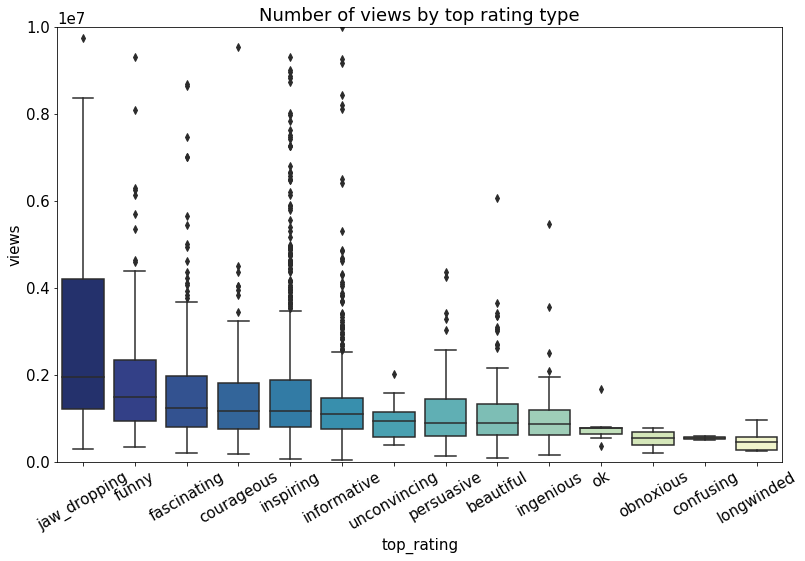

In [14]:
median_views = ratings_ted.groupby('top_rating')['views'].median().sort_values(ascending = False).index

f, ax = plt.subplots(figsize=(13,8))
ax = sns.boxplot(x='top_rating', y='views', data=ratings_ted, order=median_views, palette='YlGnBu_r')
plt.xticks(rotation=30)
plt.ylim((0,10000000))
plt.title('Number of views by top rating type');

Talks rated jaw-dropping have the highest number of views. The negatively rated talks have the fewest number of views. Next, we look focus on the number of comments.

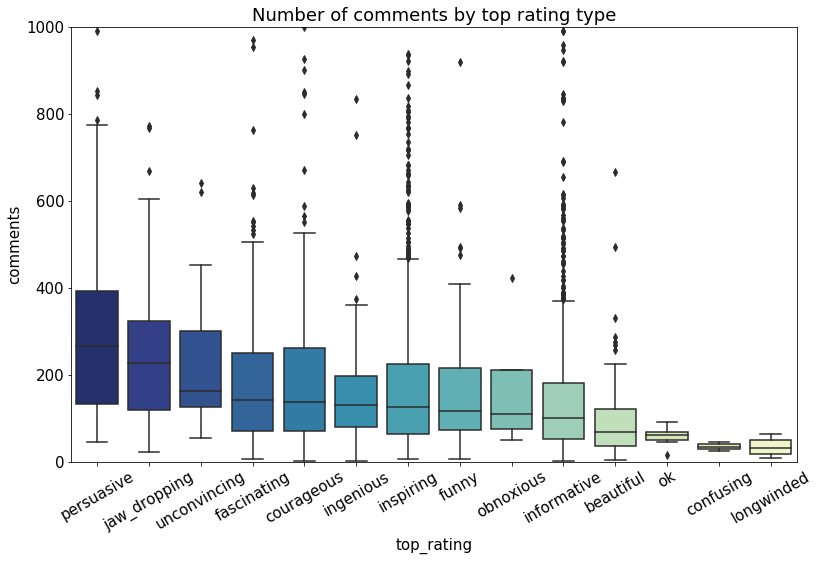

In [15]:
median_comments = ratings_ted.groupby('top_rating')['comments'].median().sort_values(ascending = False).index

f, ax = plt.subplots(figsize=(13,8))
ax = sns.boxplot(x='top_rating', y='comments', data=ratings_ted, order=median_comments, palette='YlGnBu_r')
plt.xticks(rotation=30)
plt.ylim((0,1000))
plt.title('Number of comments by top rating type');

The number of comments are the highest for persuasive and jaw-dropping talks, followed by unconvincing, which is considered a negative rating. The ones least commented on are confusing and long-winded talks. 

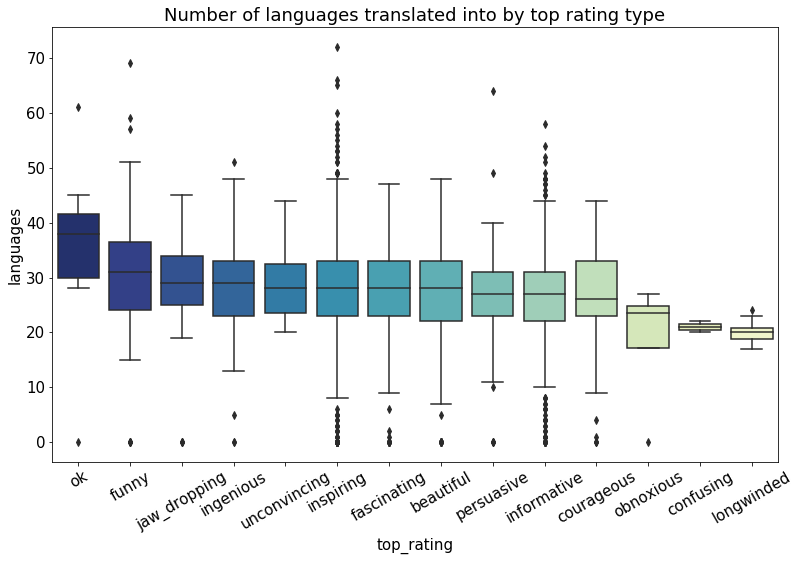

In [16]:
median_lang = ratings_ted.groupby('top_rating')['languages'].median().sort_values(ascending = False).index

f, ax = plt.subplots(figsize=(13, 8))
ax = sns.boxplot(x='top_rating', y='languages', data=ratings_ted, order=median_lang, palette='YlGnBu_r')
plt.xticks(rotation=30)
plt.title('Number of languages translated into by top rating type');

Somewhat surprisingly, the talks rated 'ok' are the ones that are translated into the highest number of languages. For the rest of the talks, they hover around the 30-language mark. The talks with the biggest number of outliers are inspiring and informative talks.

Next up is the type of talks versus the duration. We suspect that the long-winded talks are the ones with the longest duration.

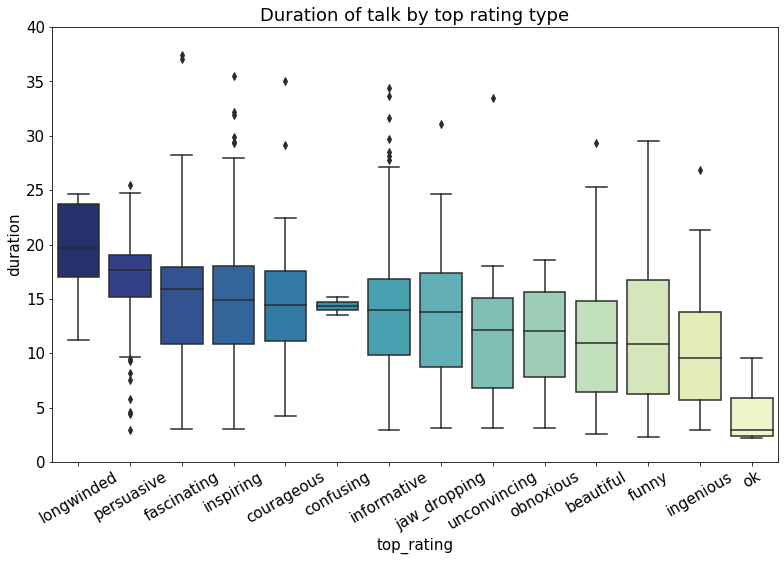

In [17]:
median_duration = ratings_ted.groupby('top_rating')['duration'].median().sort_values(ascending = False).index

f, ax = plt.subplots(figsize=(13,8))
ax = sns.boxplot(x='top_rating', y='duration', data=ratings_ted, order=median_duration, palette='YlGnBu_r')
plt.xticks(rotation=30)
plt.ylim((0,40))
plt.title('Duration of talk by top rating type');

As expected, the long-winded talks are indeed the most lengthy. Perhaps the 'ok' talks were to short to leave an impression on whether it is negative or positive. Most of the talks fall between the 10- to 15-minute range.

### Ratings, Tags and Speaker Occupation EDA

In [18]:
# Merge the data sets tags and ratings, and occupations and ratings
tags_ratings = ratings.merge(tags, how='left', on=['talk_id'])
occupations_ratings = ratings.merge(occupations, how='left', on=['talk_id'])

In [19]:
tags_ratings

,funny,beautiful,ingenious,courageous,longwinded,confusing,informative,fascinating,unconvincing,persuasive,jaw_dropping,ok,obnoxious,inspiring,total,positive,negative,talk_id,top_rating,tags
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93850,91538,1138,1,inspiring,children
1,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93850,91538,1138,1,inspiring,creativity
2,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93850,91538,1138,1,inspiring,culture
3,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93850,91538,1138,1,inspiring,dance
4,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,93850,91538,1138,1,inspiring,education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,0,12,14,0,9,3,25,9,21,5,3,11,4,26,142,94,37,2550,inspiring,play
19150,0,12,14,0,9,3,25,9,21,5,3,11,4,26,142,94,37,2550,inspiring,public spaces
19151,0,12,14,0,9,3,25,9,21,5,3,11,4,26,142,94,37,2550,inspiring,society
19152,0,12,14,0,9,3,25,9,21,5,3,11,4,26,142,94,37,2550,inspiring,software


Grouping of the talks by their top ratings will be done, with the tags counted.

In [20]:
#tags_ratings[tags_ratings.groupby('top_rating')]['tags']
tag_agg = tags_ratings.groupby('top_rating').agg({'tags':['count']})
tag_agg.sort_values('tag', ascending=False)
tag_agg

KeyError: 'tag'

In [ ]:
# Create a new dataframe that captures the count of tags for each top rating.
for rating in top_rating:
    tags_ratings['tags'].count()

In [ ]:
occupations_ratings.head()

In [ ]:
ted['total'] = ted['ratings'].apply(lambda x: sum([x[i]['count'] for i in range(len(x))]))

df['avgPerRating'] = df['aggregateRatings']/df['totalRatings']
plot.hist(x=df['avgPerRating'],bins=50,range=(-1,1),color='black')
#convenience function for density curve plotting
def plotDensityCurve(x,linspace,covariance_factor=0.25,multiplier=1,data=df,color='red'):
    tempx = np.reshape(data[x].values,(-1,)) if data is not None else x
    density = gaussian_kde(tempx)
    xs = np.linspace(linspace[0],linspace[1],linspace[2])
    density.covariance_factor = lambda: covariance_factor
    density._compute_covariance()
    plot.plot(xs,density(xs)*multiplier)
plotDensityCurve('avgPerRating',(-1,1,50),multiplier=100)